# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)


# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

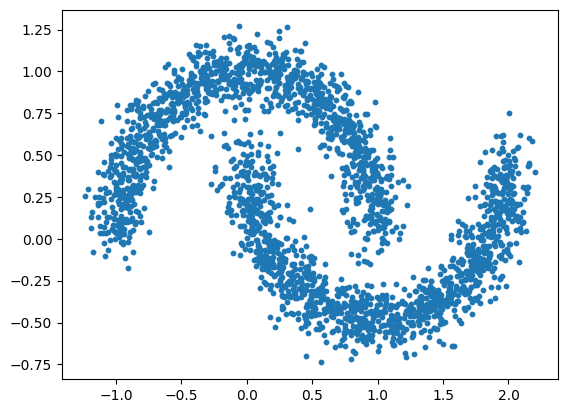

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [4]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 3,
    'p_lim': 0.33,
    'batch_size': 128,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=25, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 449 | Loss: 1.0030 | p-value: 9.97E-01:  90%|████████▉ | 448/500 [1:06:45<07:44,  8.94s/it]


Early stopping at epoch 449
Henze-Zirkler p-value:	0.9969720504399063


0.9969720504399063

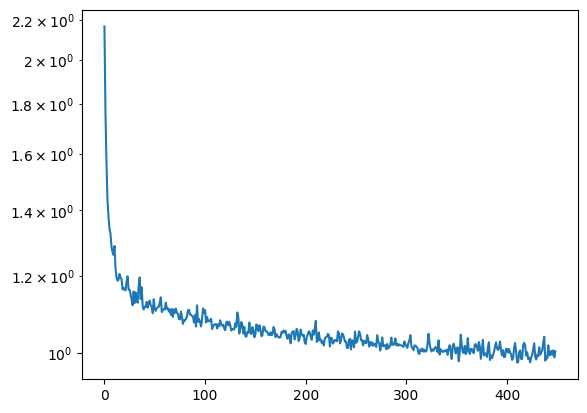

In [5]:
plt.plot(LAM.loss_history)
plt.yscale('log')

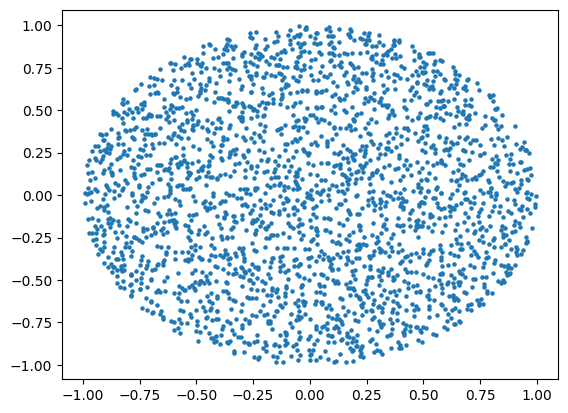

In [6]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [7]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0,  585, 1324, 2133, 1206, 2120, 1191, 1129,  236, 1033, 1961,
          637, 2332,  734, 1708, 1489, 1128, 1229,  565, 2200,  898,  645,
           87,   33,  807], dtype=int64)],
 [array([0.        , 0.00188583, 0.00230854, 0.00284444, 0.00290354,
         0.00331347, 0.00360664, 0.00395586, 0.00413813, 0.0048453 ,
         0.00492387, 0.00496228, 0.00500254, 0.00517878, 0.00525784,
         0.00537529, 0.00572385, 0.00577667, 0.00578781, 0.00579486,
         0.00584119, 0.00588678, 0.00597347, 0.00614766, 0.00623714])])

In [8]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0,  585, 1324, 2133, 1206], dtype=int64),
  array([   2,  262, 2240,  429, 2475], dtype=int64),
  array([   5,  152,  641, 2341, 1057], dtype=int64)],
 [array([0.        , 0.00188583, 0.00230854, 0.00284444, 0.00290354]),
  array([0.        , 0.00030244, 0.00042766, 0.00059884, 0.00061592]),
  array([0.        , 0.00487448, 0.00496119, 0.00535956, 0.00593961])])

In [21]:
# calculate the distance between the points 0 and 5
dist, path = LAM.distance(0, 5, return_path=True)
print(dist)

0.017592754564248025


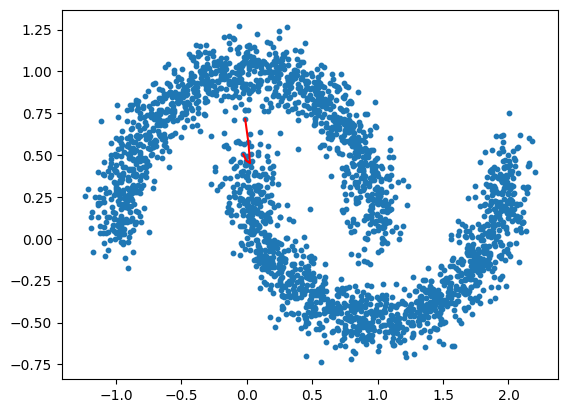

In [22]:
#plot data, and the shortest path between the points 0 and 5
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

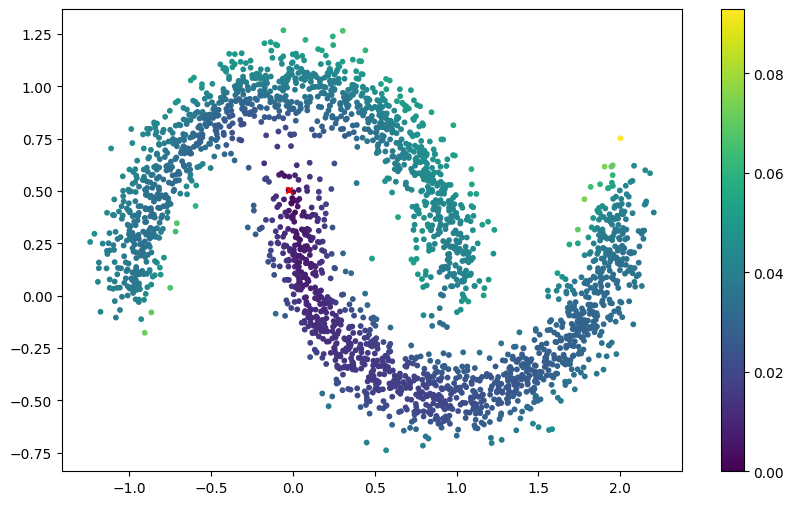

In [23]:
# calculate the distance to all points from the point 0 and plot

start_point = 0

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[start_point, 0], X[start_point, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()


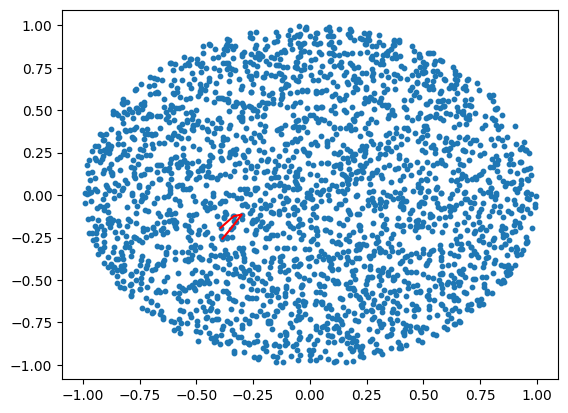

In [24]:
# plot the shortest path in the pushed space
path_pushed = LAM.data_pushed[path]

plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=10)
plt.plot(path_pushed[:, 0], path_pushed[:, 1], 'r')

plt.show()